<a href="https://colab.research.google.com/github/LucaPennella/Intro_ML_23-24/blob/main/notebooks/Lab-3.LinearLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Linear and Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from numpy.linalg import inv

## Data Geneation (cfr Lab 1)

Linear model $y=wx+\varepsilon$, with $ɛ \sim \mathcal{N}(0,\sigma)$


In [2]:
def datagen(d, points, m, M, w, sigma):
    """
    Parameters
    ----------
    d : int
        Dimension of each data sample
    points : int
        Number of points to be generated
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    w : float array of dim d
        Vector of weights of the linear model
    sigma : float
        Standard deviation of the noise eps
    """
    X = np.zeros((points, d))
    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)
    eps = np.random.normal(0, sigma, points)
    y = np.dot(X, w) + eps
    return X, y

The given Python code defines a function called `datagen` that generates random data points for a linear regression model with some added noise. Here's an explanation of what the code does:

1. An empty array `X` is created with dimensions `(points, d)` to store the generated data points. Each row of this array represents a data sample, and each column represents a feature.

2. A `for` loop iterates over each data point to be generated (`points` iterations).

3. Inside the loop, a random data sample is generated and assigned to the `i`-th row of the `X` array. This random sample is generated using `np.random.uniform(m, M, d)`, which generates `n*d` random values within the range `[m, M]` for each feature of the data point.

4. An array `eps` of random noise is generated using `np.random.normal(0, sigma, points)`. This array has the same length as the number of data points and represents random noise with a normal distribution and the specified standard deviation `sigma`.

5. The target variable `y` is generated for each data point by taking the dot product of the data point `X[i]` and the weight vector `w`. Then, the corresponding noise value `eps[i]` is added to it. This simulates a linear regression model where the target variable is a linear combination of the features with some added Gaussian noise.

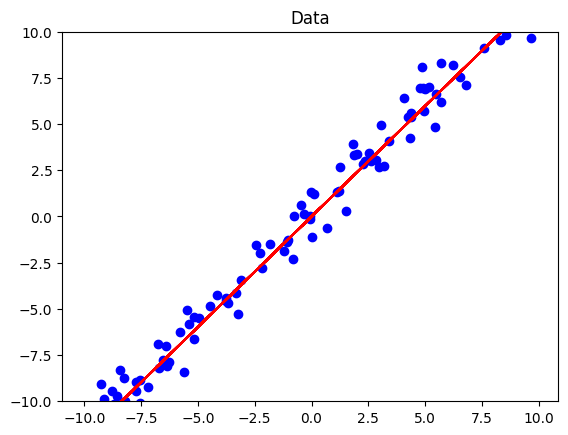

In [3]:
# usage example
d = 1
w = np.random.normal(0, 1, d)
sigma = 1
points = 100
m = -10
M = 10

X_reg, y_reg = datagen(d, points, m, M, w, sigma)

# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X_reg, y_reg, c='b')
ax.plot(X_reg, np.dot(X_reg, w), '--', c='r')
ax.set_title('Data')
plt.ylim([m, M])

fig.show()

## Linear Regression

Given a dataset $\mathcal{D}=\{(x_i, y_i)\}_{i=1}^n ⊆ \mathbb{R}^d \times \mathbb{R}$ we want to compute the best fitting line, i.e. the parameters $w$ of the line $y=w\cdot X$.

### Analytic Solution

* **Ordinary Linear Regression (i.e. no regularization):**

$$
y=Xw,\;\;\;\; w=X^{-1}y,\;\;\;\;X^{-1}=(X^{T}X)^{-1}X^{T}
$$

$$
w=(X^{T}X)^{-1}X^{T}y
$$

**Recall**: we cannot invert a matrix which is not squared, so we need to resort to the Moore-Penrose pseudo-inverse, i.e. $X^{-1}\approx (X^TX)^{-1}X^T$

* **Ridge Regression**

  If $X^{T}X$ is not invertible (i.e. some eigenvalues are zero) then we regularize by adding $\lambda \mathbb{I}$, with $\mathbb{I}$ being the identity matrix of size $d\times d$ making the zero
eigenvalues $\lambda$.

$$
w=(X^{T}X+\lambda Id)^{-1}X^{T}y
$$

  The line that we find with Ridge Regression takes the form: $y = w\cdot X + \lambda \|w\|_2$ (i.e. $L_2$ penalty)

Interesting blog post showing this analytic derivation and its implementation: https://knork.medium.com/linear-regression-in-python-from-scratch-with-kernels-e9c37f7975b9

In [4]:
def CloseRegression(X, y):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    """

    # Calculate the weight vector 'w' using the closed-form solution (normal equation).
    # w = (X^T * X)^(-1) * X^T * y
    w = (inv(X.T@X)@X.T)@y

    # Return the calculated weight vector 'w', which represents the coefficients of the linear regression model.
    return w


def CloseRegressionReg(X, y, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    lam : float
        Lambda term of Ridge regularization
    """
    # Get the number of features (dimensions) 'd' in the dataset.
    d = np.shape(X)[1]

    # Calculate the weight vector 'w' using the closed-form solution for Ridge regularization.
    # w = (X^T * X + lambda * I)^(-1) * X^T * y
    w = (inv(X.T@X+lam*np.eye(d))@X.T)@y

    # Return the calculated weight vector 'w', which represents the coefficients of the regularized linear regression model.
    return w


In [7]:
wclose = CloseRegression(X_reg, y_reg) # calculates the weights of the non-regularized lr using the `CloseRegression`. `X_reg` represents the ds matrix, and `y_reg` represents the target vector.
lam = 0.01 # This parameter will determine the strength of regularization in the regularized model.

In [8]:
wcloseReg = CloseRegressionReg(X_reg, y_reg, lam)

 `wcloseReg = CloseRegressionReg(X_reg, y_reg, lam)`: This line of code calculates the weights of the regularized linear regression model using the `CloseRegressionReg` function. Here, `X_reg` and `y_reg` still represent the dataset matrix and target labels vector, while `lam` is the regularization parameter.

In [9]:
wcloseReg, wclose, np.abs(wclose-wcloseReg)

(array([1.18484005]), array([1.18484366]), array([3.6096584e-06]))

`wcloseReg, wclose, np.abs(wclose - wcloseReg)`: This expression returns three values:
   - `wcloseReg`: The weights of the regularized linear regression model.
   - `wclose`: The weights of the non-regularized linear regression model.
   - `np.abs(wclose - wcloseReg)`: The absolute value of the differences between the weights of the two models, measuring how much the weights differ between the regularized and non-regularized models.

In essence, this code calculates the weights for two linear regression models, one with regularization (Ridge) and one without, and provides a measure of the difference between the weights of these models. This difference can be useful for assessing the effect of regularization on the model's weights and understanding how model complexity is influenced by regularization.

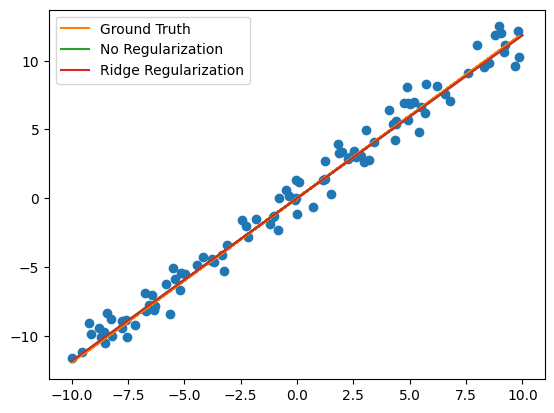

In [10]:
# plot the solution of both regressions

# Create a linearly spaced range of values for x
xlin = np.linspace(-10,10,100)

# Calculate predicted y values for the non-regularized model
ypred = wclose*xlin

# Calculate predicted y values for the regularized model
ypredreg = wcloseReg*xlin

fig, ax = plt.subplots()
ax.plot(X_reg, y_reg, 'o')
ax.plot(X_reg, np.dot(X_reg,w), label='Ground Truth')
ax.plot(xlin, ypred, label='No Regularization')
ax.plot(xlin, ypredreg, label='Ridge Regularization')
plt.legend()
fig.show()

1. Try to vary the parameter $\lambda$ and check what happens to the magnitude of the found $w$ (try to inspect it visually with a plot)

## Gradient Descent (GD) method

**Recall**: the gradient indicates the direction of maximal ascent of a function. Hence to find the minimum of a function we have to follow the direction of the negative gradient. In GD we take a step of size $\gamma$ (learning rate). Given a loss function $\mathcal{L}(w)$ it works as:

1. Initialize $w_0$
2. while (condition):
   * compute gradient of the loss at t $\nabla_w \mathcal{L}|_t$
   * update weights as $w_{t+1} = w_t - \gamma \nabla_w \mathcal{L}|_t $


In the case of linear regression the squared error loss and its gradient read as:


$$
\mathcal{L}=\frac{1}{n}\|y-Xw\|_{2}^{2},\;\;\;\;\nabla_{w} \mathcal{L} = -\frac{2}{n}X(y-Xw)
$$

As condition for the while loop we use a predefined number of iterations.

In summary, Gradient Descent is an iterative optimization technique that adjusts a parameter vector to minimize a loss function. It does this by taking steps in the direction of the negative gradient, gradually converging towards the minimum of the function. For linear regression, this means finding the best-fit line that minimizes the squared error between predictions and actual values.

In [11]:
def SquareLoss(X, y, w):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line
    """
    return LA.norm(y-X@w,2)

The function calculates the square loss as follows:

1. `X @ w`: This is the matrix-vector multiplication of the dataset `X` with the weight vector `w`. It results in a vector of predicted values, one for each data point.

2. `y - X @ w`: This computes the element-wise difference between the true values `y` and the predicted values obtained in the previous step.

3. `LA.norm(y - X @ w, 2)`: This computes the L2 norm (Euclidean norm) of the vector obtained in step 2, which is essentially the square root of the sum of squared differences between true and predicted values.

4. The computed L2 norm represents the square loss, which measures how well the linear model's predictions match the actual ground truth values. Smaller values indicate better model fit, while larger values indicate greater prediction errors.

In [12]:
def GD(X, y, iter, gamma, points, d):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    points : int
        Number of points in our dataset
    d : int
        Dimensionality of each data point in the dataset
    """
    # Initialize arrays to store weights and losses
    W = np.zeros((d, iter)) # To store weights at each iteration
    L = np.zeros(iter) # To store losses at each iteration

    # Initialize the weight vector w with small random values
    w = np.random.normal(0, 0.1, d)

    # GD iterations
    for i in range(iter):
        # Store the current weight vector in W
        W[:,i] = w

        # Update the weight vector w using Gradient Descent
        # The update rule is based on the gradient of the loss
        w = w + (2*gamma/points)*((y-X@w)@X)

        # Calculate and store the loss at the current iteration
        L[i] = SquareLoss(X,y,w)

    # Return the history of weight vectors and loss values
    return W, L

In [13]:
# example of usage

# Determine the dimensionality of the dataset
d = np.shape(X_reg)[1]

iter = 1000
n_points = 100
gamma = 0.001

# Apply Gradient Descent (GD) to train a linear regression model
wgd, L = GD(X_reg, y_reg, iter, gamma, points, d)
# the last stored weights are the most updated ones
wpred = wgd[:,-1]

In [14]:
w, wpred, np.abs(w-wpred)

(array([1.19581911]), array([1.18484366]), array([0.01097545]))

***Plot the Loss***

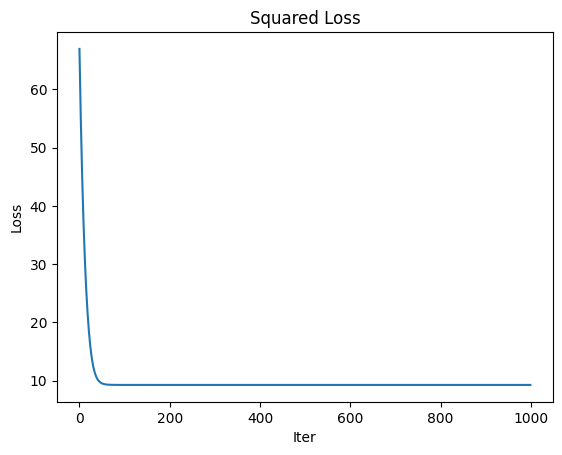

In [15]:
plt.plot(L)
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Squared Loss');

***Plot the predictions***

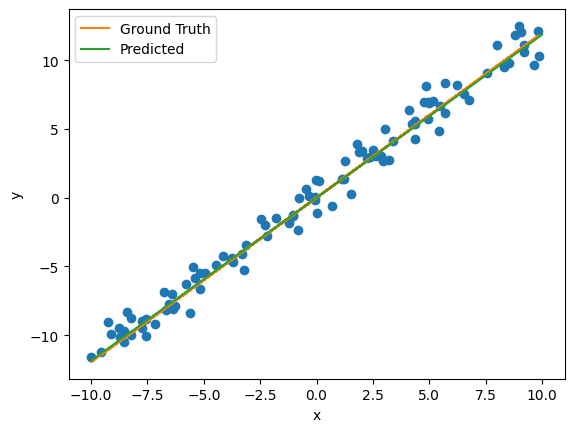

In [16]:
xlin = np.linspace(-10, 10, 100)
ypred = wpred*xlin

fig, ax = plt.subplots()
ax.plot(X_reg, y_reg, 'o')
ax.plot(X_reg, np.dot(X_reg, w), label='Ground Truth')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(xlin,ypred, label= 'Predicted')
plt.legend()
fig.show();

### Polynomial regression

Polynomial regression is a type of regression analysis where we model the relationship between a variable "x" and another variable "y" using a polynomial equation. In simple terms, it's like fitting a curve to our data instead of a straight line.
The equation for polynomial regression looks like this:

$$
y = w_0 + \sum_{j=1}^{\text{deg}-1} w_j x^j
$$

Here:
- "y" is our target variable.
- "x" is our input variable.
- "w_0," "w_1," "w_2," and so on are coefficients that determine the shape of the curve.
- The "deg" represents the degree of the polynomial, which determines how many terms (powers of "x") are in our equation.

**Remark**: note that the regression function is linear in terms of the unknown variables $w$.

**Squared Loss**:

To find the best-fitting curve, we need to minimize the error between our predicted values ("y_hat") and the actual values ("y"). We measure this error using the squared loss formula:

$$
\mathcal{L}(w) = \frac{1}{n} \sum_{i=0}^n \big(y_i - \big(w_0 + \sum_{j=1}^{\text{deg}-1} w_j x_i^j\big)\big)^2 = \frac{1}{n} \sum_{i=0}^n \big(y_i - \hat{y}_i\big)^2
$$

**Gradient Descent (GD)**:

Gradient Descent is an optimization technique used to find the best values for our coefficients "w." To do this, we need to know how the loss changes with respect to each coefficient. We calculate these changes using derivatives:

- The derivative of the loss with respect to "w_0" is given by

$$
\frac{\partial\mathcal{L}}{\partial w_0} = - \frac{2}{n} \sum_{i=0}^n (y_i - \hat{y}_i)\ \text{with}\ j=0 \\
$$

- The derivatives of the loss with respect to other coefficients "w_j" (where "j" is not 0) are given by:

$$
\frac{\partial\mathcal{L}}{\partial w_j} = - \frac{2}{n} \sum_{i=0}^n x_i^j \cdot (y_i - \hat{y}_i)\ \text{with}\ j\neq 0
$$

These derivatives tell us how much we should adjust each coefficient to minimize the loss.

In Gradient Descent, we update each coefficient separately using the following formula:

$$
w_0^{(t+1)} = w_0^{(t)} - \gamma \frac{\partial\mathcal{L}}{\partial w_0}\ \text{with}\ j=0 \\
w_j^{(t+1)} = w_j^{(t)} - \gamma \frac{\partial\mathcal{L}}{\partial w_j}\ \text{with}\ j\neq0
$$

Here:
- "t" represents the current iteration.
- "gamma" is the learning rate, which controls the size of the steps we take to update our coefficients.

In summary, polynomial regression is about fitting a curve to data, and Gradient Descent helps us find the best curve by adjusting the curve's coefficients to minimize the squared loss between predicted and actual values.

In [17]:
def evaluate_poly(X, w):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    w : array of float of dim deg
        Coefficients of the polynomial
    """
    # this is the actual degree - 1 because we have to consider the intercept
    deg = len(w)

    # column i is the i-th power of the datapoints
    X_pow = np.concatenate([np.power(X, i) for i in range(1, deg)], axis=1)
    return np.dot(X_pow, w[1:]) + w[0]

The function performs the following steps:

1. Calculate the degree of the polynomial model (deg) by finding the length of the coefficient array 'w.'

2. Create a new array `X_pow` that will hold the powers of the input data points 'X.' For each degree 'i' from 1 to 'deg - 1' (excluding the intercept term), it calculates the element-wise power of 'X' to the 'i' and concatenates these results along the columns axis. This creates a matrix where each column represents the data points raised to a different power.

3. Finally, the function calculates the predicted values by taking the dot product of 'X_pow' and the coefficients 'w' starting from the second element (index 1). It also adds the intercept term 'w[0]' to the result.

In summary, this function takes a dataset and a set of polynomial coefficients, including the intercept, and evaluates the polynomial model on the dataset by raising the data points to the appropriate powers and calculating the predicted values.

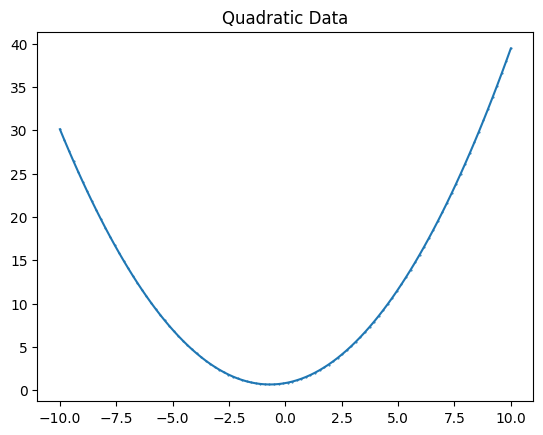

In [20]:
# Create an array 'x_poly' with 100 evenly spaced values between -10 and 10.
# Reshape it to be a column vector (100 rows, 1 column).
x_poly = np.linspace(-10, 10, 100).reshape(100, 1)

# Generate random coefficients 'w' for a quadratic polynomial.
# 'w' will have 3 coefficients, representing the quadratic term, linear term, and intercept.
w = np.random.rand(3)

# Evaluate the quadratic polynomial defined by 'w' on the 'x_poly' data points.
y_poly = evaluate_poly(x_poly, w)

fig, ax = plt.subplots()
ax.plot(x_poly, y_poly, '-o', markersize=.5)
plt.title('Quadratic Data')
fig.show();

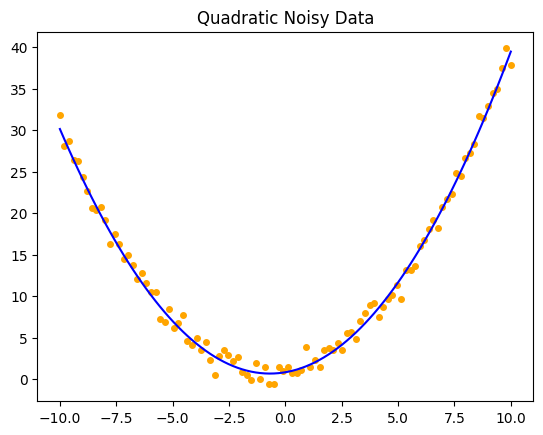

In [21]:
# add noise to the dataset

# Generate random noise 'eps' from a normal distribution with mean 0 and standard deviation 1.
# The length of 'eps' matches the number of data points in 'y_poly.'
eps = np.random.normal(0, 1, len(y_poly))
y_poly_noise = y_poly + eps

fig, ax = plt.subplots()
ax.plot(x_poly, y_poly_noise, 'o', markersize=4, c='orange')
ax.plot(x_poly, y_poly, '-', c='blue')
plt.title('Quadratic Noisy Data')
fig.show();

2. Implement GD for polynomial regression

  **Hint**: start with polynomials of degree $2$ then try to generalize to polynomials of arbitrary degree

## Logistic Regression

### Generate the data and plot (noisy) data (cfr Lab 1)

In [23]:
def mixGauss(means, sigmas, n):
    """
    Parameters
    ----------
    means : matrix/list of float of dim n_classes x dim_data (d)
        Means of the Gaussian functions
    sigmas : array/list of float of dim n_classes
        Standard deviation of the Gaussian functions
    n : int
        Number of points for each class
    """
    means = np.array(means)
    sigmas = np.array(sigmas)

    d = np.shape(means)[1] # the means matrix is of n_classes x dim_data
    num_classes = sigmas.size # the number of variances is the number of classes

    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    # iterate over classes
    for idx, sigma in enumerate(sigmas):
        # generates n points around means[idx] with cov sigma[idx]
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(
            mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2, size=n)
        labels[idx * n:(idx + 1) * n] = idx

    if(num_classes == 2):
        labels[labels == 0] = -1

    return data, labels

The following code defines a Python function called `mixGauss` that generates data sampled from a mixture of Gaussian distributions.

1. The `means` and `sigmas` inputs are converted into NumPy arrays to facilitate further processing.

2. The variable `d` is initialized with the dimension of the data `dim_data` present in `means`. This value represents the number of dimensions of the data.

3. The variable `num_classes` is initialized with the size of `sigmas`, which represents the number of classes of Gaussian distributions.

4. An empty data matrix `data` is created with dimensions `(n * num_classes, d)` and filled with `np.inf` initially. This matrix will be used to store the generated data points.

5. An empty labels array `labels` is created with dimensions `n * num_classes` and initialized with zeros. This array will store the class labels for the generated data points.

6. The code iterates over the classes using a `for` loop with an index `idx` and the corresponding standard deviation `sigma` from the `sigmas` list.

7. Inside the loop, for each class, `n` data points are generated around the mean `means[idx]` with a covariance matrix of `np.eye(d) * sigmas[idx] ** 2`. The `np.random.multivariate_normal` function is used for this purpose. It generates random samples from a multivariate Gaussian distribution.

8. The generated data points are stored in the `data` array from index `idx * n` to `(idx + 1) * n`, and their labels are set in the `labels` array to the class index `idx`.

9. If there are only two classes (`num_classes == 2`), a special case is handled: the labels are converted such that all instances labeled as `0` are changed to `-1`. This is a common operation in binary classification tasks.

10. The function returns two arrays: `data`, which contains the generated data points, and `labels`, which contains the corresponding class labels.

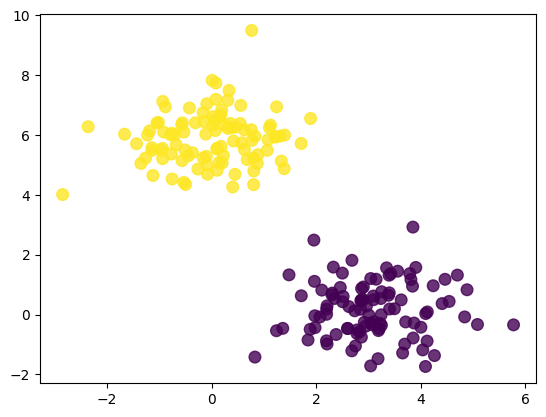

In [24]:
# usage example
means = [[3,0],[0,6]]
sigmas = [0.9,0.9]
n = 100

X, labels = mixGauss(means, sigmas, n)

# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=labels, alpha=0.8)
fig.show()

In [25]:
def labelsnoise(perc, labels):
    """
    Parameters
    ----------
    perc : float
        Percentage of labels to be flipped
    labels: array of int of dim n_classes
        Array containing labels idxs
    """
    points = np.shape(labels)[0]
    noisylabels = np.copy(np.squeeze(labels))
    n_flips = int(np.floor(points * perc / 100)) # floor: nearest integer by defect
    idx_to_flip = np.random.choice(points, size=n_flips, replace=False) # replace is false since the same index cannot be chosen twice
    noisylabels[idx_to_flip] = -noisylabels[idx_to_flip] # for binary this turns -1 into 1 and viceversa
    return noisylabels

The provided code defines a Python function called `labelsnoise` that introduces noise into a set of labels by flipping a specified percentage of them.

1. The number of data points, `points`, is determined by the length of the `labels` array using `np.shape(labels)[0]`.

2. A copy of the `labels` array is created and stored in the variable `noisylabels` using `np.copy(np.squeeze(labels))`. This copy will be modified to introduce noise without affecting the original `labels` array.

3. The number of labels to be flipped, `n_flips`, is calculated as an integer by flooring the result of `(points * perc / 100)`. This calculation determines how many labels will be flipped based on the specified percentage.

4. An array of random indices to flip, `idx_to_flip`, is generated using `np.random.choice(points, size=n_flips, replace=False)`. The `replace=False` argument ensures that the same index cannot be chosen more than once, avoiding duplicates.

5. The selected labels at the indices specified in `idx_to_flip` are flipped by changing their sign. For binary labels (e.g., -1 and 1), this operation turns `-1` into `1` and vice versa.

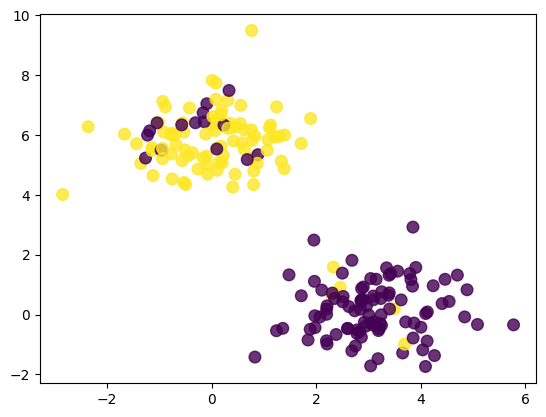

In [26]:
noisylabels = labelsnoise(10, labels)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=noisylabels, alpha=0.8)
fig.show()

***Sigmoidal function***

$$
\sigma(wx_i) = \frac{1}{1 + e^{-wx_i}}
$$

The sigmoidal function, often denoted as σ or the sigmoid function, is a mathematical function commonly used in machine learning and statistics. It maps any real number 'wx_i' to a value between 0 and 1.

- **'wx_i'**: This is the input to the sigmoid function. It's a real number obtained by taking the dot product of a weight 'w' and a feature 'x_i'. 'w' represents a weight parameter, and 'x_i' represents a input variable.

- **'$1 + e^{-wx_i}$'**: Here, '1' is added to the result obtained in the previous step. This addition ensures that the denominator is never zero.

- **'$\frac{1}{1 + e^{-wx_i}}$'**: Finally, the function takes the reciprocal of the result from the previous step, which ensures that the output of the sigmoid function is in the range (0, 1).

In summary, the sigmoidal function takes an input 'wx_i,' applies a mathematical transformation involving exponentiation and division, and produces an output in the range between 0 and 1. It's often used in machine learning for tasks like binary classification, where it maps input values to probabilities. When 'wx_i' is positive, the sigmoid function approaches 1, and when 'wx_i' is negative, it approaches 0, making it useful for modeling probabilities or decision boundaries.

In [30]:
def sigmoid(x, w):
    """
    Parameters
    ----------
    x : array of dim n
        Array containing the datapoint
    w : float
        Number representing the 'temperature' of the sigmoid
    """
    y = 1/(1+np.exp(-np.dot(x,w)))
    return y

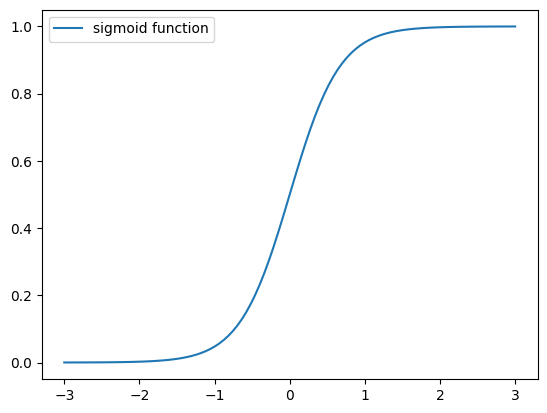

In [28]:
# usage example
x = np.linspace(-3,3,100)
w = 3
y = sigmoid(x, w)

fig, ax = plt.subplots()
ax.plot(x, y, label='sigmoid function')
plt.legend();
fig.show()

## Logistic Loss

In logistic regression, the goal is to model the probability that a given input 'x' belongs to a particular class (usually 0 or 1). To do this, logistic regression employs a hypothesis function 'h(x)' that transforms the linear combination of features and weights 'w^T*x' into a probability value using the sigmoid function 'σ(wx)'.

* For regression the hypothesis was: $h(x)=w^Tx$
* For logistic regression is $h(x)=\sigma(wx)=\frac{1}{1+e^{-w^Tx}}$

- **Decision Boundary**: Logistic regression makes binary classification decisions based on the value of 'h(x)':

$$
h(x) =
\begin{cases}
  >0.5, & w^{T}x>0\\
  <0.5, & w^{T}x<0
\end{cases}
$$

  If 'h(x)' is greater than 0.5, the model predicts class 1; otherwise, it predicts class 0. The threshold of 0.5 is commonly used, but it can be adjusted depending on the problem.

- **Cost Function**: To train a logistic regression model, you need a cost function that measures how well the model's predictions align with the actual class labels 'y'. The logistic loss, often referred to as the log loss or cross-entropy loss, is used to compute the cost.


$$
cost =
\begin{cases}
  -log(h(x)), & y=1\\
  -log(1-h(x)), & y=0
\end{cases}
$$

  The cost function penalizes the model when it makes incorrect predictions. If 'y' is 1 (indicating that the true class is positive), the cost is high when 'h(x)' is close to 0 (indicating a low predicted probability of class 1). Similarly, if 'y' is 0 (indicating that the true class is negative), the cost is high when 'h(x)' is close to 1 (indicating a high predicted probability of class 1).

The goal of logistic regression is to learn the optimal 'w' that minimizes this cost function, effectively finding the best weights for the model to make accurate class predictions.

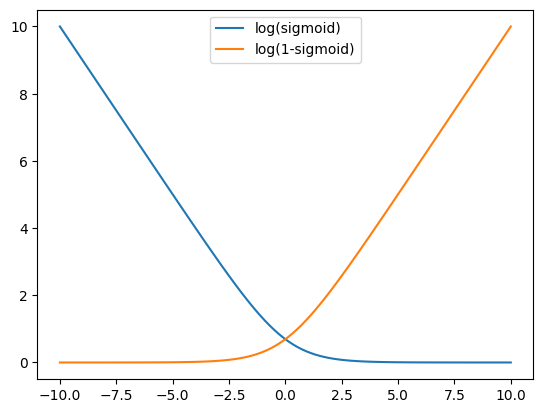

In [29]:
# plot case-specific cost
w = 1
x = np.linspace(-10,10,100)
plt.plot(x, -np.log(sigmoid(x,w)),label="log(sigmoid)")
plt.plot(x, -np.log(1-sigmoid(x,w)),label="log(1-sigmoid)")
plt.legend()
plt.show()

**Logistic loss Formula**


The logistic loss is a measure used to assess the goodness of fit of a logistic regression model. It quantifies the difference between the model's predictions (given by 'h(x,w)') and the actual binary labels 'y'. Here's the formula for the logistic loss:

$$
L=-y\cdot \log(h(x,w))-(1 - y)\cdot \log(1-h(x,w))
$$

  - 'y' represents the actual binary label (0 or 1).
  - 'h(x,w)' is the predicted probability that 'x' belongs to class 1 based on the logistic regression model with weights 'w'.

The logistic loss measures how well the model's predicted probabilities align with the true binary labels. When the true label 'y' is 1, the first term measures the loss associated with the model predicting class 0 when it should be 1. Similarly, when 'y' is 0, the second term measures the loss associated with the model predicting class 1 when it should be 0.

**Minimization of the Logistic loss**

To train a logistic regression model, you need to find the optimal set of weights 'w' that minimizes the logistic loss. This is typically done using an optimization algorithm like gradient descent. Here's the update rule for minimizing the logistic loss with gradient descent:

$$
w_{j}\leftarrow w_{j}-\frac{\gamma}{n}\sum_{i=1}^{n}(y^{i}-h(x^{i}))x^{i}_{j}
$$
In compact form:

$$
w\leftarrow w -\frac{\gamma}{n}X^{T}(h(X)-y)
$$

The update rule essentially adjusts each weight 'w_j' based on the difference between the model's prediction and the actual label for each data point. The goal is to iteratively update the weights to minimize the logistic loss, ultimately leading to a well-fitted logistic regression model for binary classification.



In [32]:
def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    y = 1/(1+np.exp(-np.matmul(X,w)))
    return y

- `np.matmul(X, w)` computes the dot product of the feature matrix `X` and the coefficient vector `w` for each data point. This essentially calculates the linear part of the logistic regression model.

- `np.exp(-np.matmul(X, w))` computes the exponential of the negative linear combination.

- `1 / (1 + np.exp(-np.matmul(X, w)))` applies the sigmoid transformation to each element of the linear combination, resulting in a vector of probabilities. These probabilities represent the likelihood of each data point belonging to the positive class in binary classification.

In [33]:
def LogisticLoss(X, labels, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w)))
    return cost

  - `labels * log(sigmoid(Xw))` computes the log-likelihood of the true class (1) for each data point when the model predicts the probability using `sigmoidM(X, w)`. This part measures how well the model predicts positive examples when the true label is 1.

  - `(1 - labels) * log(1 - sigmoid(Xw))` computes the log-likelihood of the true class (0) for each data point when the model predicts the probability. This part measures how well the model predicts negative examples when the true label is 0.

  - The sum over all data points and the negative scaling factor `(1/n)` compute the average logistic loss over the entire dataset.

This code calculates the logistic loss, which quantifies how well a logistic regression model's predictions match the true labels in a binary classification problem.

In [34]:
def GDLogistic(X, labels, iter, gamma):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    d = np.shape(X)  # d contains the shape of X, which is a tuple (n, d)
    cost = np.zeros(iter)  # Create an array to store the cost at each iteration
    w = np.random.uniform(0, 0.01, d[1])  # Initialize w with random values
    W = np.zeros((2, iter))  # Create an array to store the weight vectors at each iteration

    for i in range(iter):
        W[:, i] = w  # Store the current weight vector in the W array
        # Update the weight vector using gradient descent
        w = w - (2 * gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels))
        # Compute and store the logistic loss for the current weight vector
        cost[i] = LogisticLoss(X, labels, w)

    return W, cost



The main loop iterates `iter` times, performing the following steps in each iteration:

1. Store the current weight vector `w` in the `W` array.

2. Update the weight vector `w` using gradient descent. This step adjusts the weights in the direction that minimizes the logistic loss.

3. Compute the logistic loss for the current weight vector `w` using the `LogisticLoss` function and store it in the `cost` array.

4. Repeat the above steps for the specified number of iterations.

The function returns both the array `W`, which contains the weight vectors at each iteration, and the array `cost`, which contains the logistic loss values at each iteration.

In [35]:
# usage example
iter = 500
gamma = 0.0001
W, cost = GDLogistic(X, noisylabels, iter, gamma)

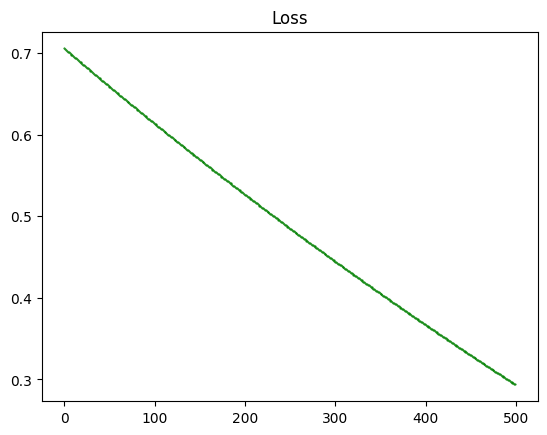

In [36]:
fig, ax = plt.subplots()
ax.plot(cost, 'go', markersize=0.5)
ax.set_title('Loss')
fig.show()

***Plotting the decision boundary***

The decision boundary is used to predict which class a new point might correspond to.
The decision boundary in a classification problem is a mathematical construct that separates different classes or categories in the feature space.

Its derivation is:

$$0=w^{T}x=x_{1}w_{1}+x_{2}w_{2}\rightarrow x_{2}=-\frac{x_{1}w_{1}}{w_{2}}$$

In practical terms, when you have trained a logistic regression or linear classification model, the decision boundary is the line (in 2D) or hyperplane (in higher dimensions) that separates the two classes. New data points are classified based on which side of the decision boundary they fall on. If they are on one side, they are assigned to class 0, and if they are on the other side, they are assigned to class 1. The equation provided helps calculate the position of this boundary in terms of the feature values and the model's weights.

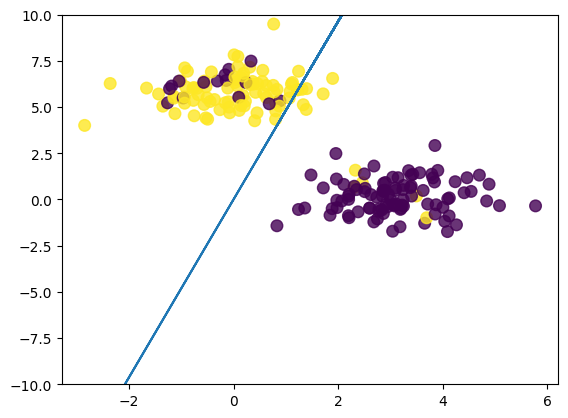

In [37]:
w = W[:,iter-1]
y = -(np.dot(X[:,0], w[0])/w[1])

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=noisylabels, alpha=0.8)
ax.plot(X[:,0], y)
plt.ylim([m, M])
fig.show()

## Accuracy

The accuracy is a metric used for classification problems defined as the number of correct predictions divided by the total number of predictions.

In [38]:
def accuracy(X, w, labels):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    labels : array of dim n
        Vector representing the ground truth label of each data point
    """
    a = labels - (2*np.round(sigmoidM(X,w))-1)
    acc = np.sum(a==0)/np.shape(X)[0]
    return acc

 For variable `a`
  - `np.round(sigmoidM(X,w))`: It computes the sigmoid function's output for each data point in the dataset.
  - `2*np.round(sigmoidM(X,w))-1`: This line scales the sigmoid outputs so that they are either 1 or -1.
  - `labels - (2*np.round(sigmoidM(X,w))-1)`: This subtracts the ground truth labels from the scaled sigmoid outputs. This results in an array where a value of 0 indicates a correct prediction, and non-zero values indicate incorrect predictions.

For variable `acc`

- This line calculates the accuracy by counting the number of correct predictions (where `a` is equal to 0) and dividing it by the total number of data points (`np.shape(X)[0]`), which gives the proportion of correctly classified data points.

In [39]:
accuracy(X, w, noisylabels)

0.87

### Generate binary data with a separator

3. Repeat the experiment generating data with a linear separator (take the generating function from Lab 1).

In [40]:
def binary(a, b, points, m, M, d):
    """
    Parameters
    ----------
    a : float
        Angular coefficient of the separating line
    b : float
        Intercept of the separating line
    points : int
        Number of points to be generated
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    d : int
        Dimension of each data sample
    """
    X = np.zeros((points,d))
    labels = np.zeros(points)

    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)
    """"
    Generate points random data points in the d-dimensional space.
    Each data point is created by randomly sampling values within the specified domain [m, M] for each dimension.
    """

    labels[X[:,1]-a*X[:,0]-b>=0] = 1
    labels[X[:,1]-a*X[:,0]-b<0] = -1
    return X, labels

In summary, this function generates a binary classification dataset with a linear decision boundary specified by `a` and `b`. It creates `points` data points within the domain `[m, M]` in `d` dimensions and assigns class labels based on their relative position to the decision boundary.


In [41]:
def flipLabels(perc, Y):
    """
    Parameters
    ----------
    perc : float
        Percentage of labels to be flipped
    Y: array of int of dim n_points
        Array containing the class idx of each data point
    """
    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

`flipLabels`:

1. The code performs several checks on the input parameters to ensure they are valid and the operation can proceed safely.

2. A copy of the input labels array, `Y`, is created and stored in the variable `Y_noisy`. The `squeeze` function is used to remove dimensions of size 1, and `copy` ensures that the original array is not modified.

3. It checks if the dimension of the `Y_noisy` array is greater than 1 (i.e., it has more than one dimension). If the input array has more than one dimension, it prints an error message and returns `-1`.

4. The total number of data points, `n`, is determined based on the size of the `Y_noisy` array.

5. The number of labels to be flipped, `n_flips`, is calculated as an integer by flooring the result of `(n * perc / 100)`.

8. An array of random indices to flip, `idx_to_flip`, is generated using `np.random.choice(n, size=n_flips, replace=False)`.

9. The selected labels at the indices specified in `idx_to_flip` are flipped by changing their sign.

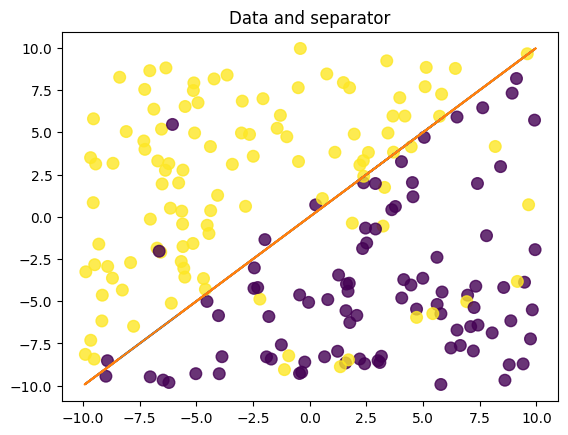

In [42]:
X, labels = binary(1, 0, 200, -10, 10, 2)
labels = flipLabels(10, labels)

# plotting the generated dataset
fig,ax=plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=labels, alpha=0.8)
ax.plot(X, 1*X+0)
ax.set_title('Data and separator')
plt.show()

4. Explore the `scikit-learn` functions for linear and logistic regression.

* Linear Regression: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* Logistic Regression: [LogisticRregression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)